In [12]:
import yfinance as yf
import pandas as pd
# pip install yfinance
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from datetime import datetime # convert timestamp and revese to string
%matplotlib inline
import quantstats as qs
import pandas_ta as ta
import math



ModuleNotFoundError: No module named 'pandas_ta'

# Down Load the SPY Data Frame

In [13]:
# While closing price merely refers to the cost of shares at the end of the day, 
#the adjusted closing price considers other factors like dividends, stock splits,
#and new stock offerings. Since the adjusted closing price begins where the closing price ends,
#it can be called a more accurate measure of stocks' value.
SPYadj=yf.download("SPY")
SPYadj

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,25.334030,1003200
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.514212,480500
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.568266,201300
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.838545,529400
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.946669,531500
...,...,...,...,...,...,...
2022-12-02,402.250000,407.859985,402.140015,406.910004,406.910004,85273900
2022-12-05,403.950012,404.929993,398.170013,399.589996,399.589996,77289800
2022-12-06,399.420013,399.989990,391.640015,393.829987,393.829987,77972200


# Download ACWX data

In [14]:
#https://etfdb.com/index/msci-all-country-world-index-ex-usa/
ACWXdf=yf.download("ACWX")
ACWXdf

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-04-01,50.910000,51.360001,50.910000,51.360001,36.048756,1100
2008-04-02,51.849998,52.029999,51.849998,51.860001,36.399700,2000
2008-04-03,52.110001,52.360001,52.110001,52.320000,36.722569,1800
2008-04-04,57.549999,57.549999,52.259998,52.450001,36.813805,1700
2008-04-07,52.209999,52.709999,50.820000,52.709999,36.996304,800
...,...,...,...,...,...,...
2022-12-02,46.810001,47.369999,46.799999,47.220001,47.220001,2660400
2022-12-05,47.139999,47.200001,46.480000,46.570000,46.570000,3040500
2022-12-06,46.660000,46.759998,46.230000,46.380001,46.380001,1848800


In [15]:
#### try vs code for qsstats

# Data Validation

In [16]:
SPYadj.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7521 entries, 1993-01-29 to 2022-12-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       7521 non-null   float64
 1   High       7521 non-null   float64
 2   Low        7521 non-null   float64
 3   Close      7521 non-null   float64
 4   Adj Close  7521 non-null   float64
 5   Volume     7521 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 411.3 KB


In [17]:
# note after dropna() still 7518 row; 
SPYadj.dropna()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,25.334030,1003200
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.514212,480500
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.568266,201300
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.838545,529400
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.946669,531500
...,...,...,...,...,...,...
2022-12-02,402.250000,407.859985,402.140015,406.910004,406.910004,85273900
2022-12-05,403.950012,404.929993,398.170013,399.589996,399.589996,77289800
2022-12-06,399.420013,399.989990,391.640015,393.829987,393.829987,77972200


In [18]:
ACWXdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3701 entries, 2008-04-01 to 2022-12-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3701 non-null   float64
 1   High       3701 non-null   float64
 2   Low        3701 non-null   float64
 3   Close      3701 non-null   float64
 4   Adj Close  3701 non-null   float64
 5   Volume     3701 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 202.4 KB


In [19]:
# note still 3689 rows after
ACWXdf.dropna()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-04-01,50.910000,51.360001,50.910000,51.360001,36.048756,1100
2008-04-02,51.849998,52.029999,51.849998,51.860001,36.399700,2000
2008-04-03,52.110001,52.360001,52.110001,52.320000,36.722569,1800
2008-04-04,57.549999,57.549999,52.259998,52.450001,36.813805,1700
2008-04-07,52.209999,52.709999,50.820000,52.709999,36.996304,800
...,...,...,...,...,...,...
2022-12-02,46.810001,47.369999,46.799999,47.220001,47.220001,2660400
2022-12-05,47.139999,47.200001,46.480000,46.570000,46.570000,3040500
2022-12-06,46.660000,46.759998,46.230000,46.380001,46.380001,1848800


# function to compare the two tickers

In [20]:
# note the original libarary has a know issue with the html report generation here is quote to fix under functions
##import ticker has to be string format
def compareto_BenchMarkFC(ticker1,ticker2):
    stock = qs.utils.download_returns(ticker1)
    bench = qs.utils.download_returns(ticker2)
    stock.index = stock.index.tz_convert(None)
    bench.index = bench.index.tz_convert(None)
    qs.reports.html(stock, mode='full', benchmark=bench,ouput='Strategy_vs_Bench.html')
    qs.reports.full(stock,benchmark=bench)

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               1993-01-29  1993-01-29
End Period                 2022-12-08  2022-12-08
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      17.0%

Cumulative Return          1,464.06%   29.38%
CAGR﹪                     9.64%       0.87%

Sharpe                     0.58        0.13
Prob. Sharpe Ratio         99.92%      78.42%
Smart Sharpe               0.53        0.12
Sortino                    0.82        0.24
Smart Sortino              0.76        0.22
Sortino/√2                 0.58        0.17
Smart Sortino/√2           0.54        0.15
Omega                      1.12        1.12

Max Drawdown               -55.19%     -55.87%
Longest DD Days            2403        1827
Volatility (ann.)          18.93%      18.81%
R^2                        0.03        0.03
Information Ratio          0.02        0.02
Calmar                     0.17        

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-10-10,2009-03-09,2012-08-16,1772,-55.189441,-50.090605
2,2000-03-27,2002-10-09,2006-10-26,2403,-47.515883,-44.117729
3,2020-02-20,2020-03-23,2020-08-10,171,-33.717270,-29.109784
4,2022-01-04,2022-10-12,2022-12-08,338,-24.496389,-24.246519
5,2018-09-21,2018-12-24,2019-04-12,203,-19.348910,-15.952020


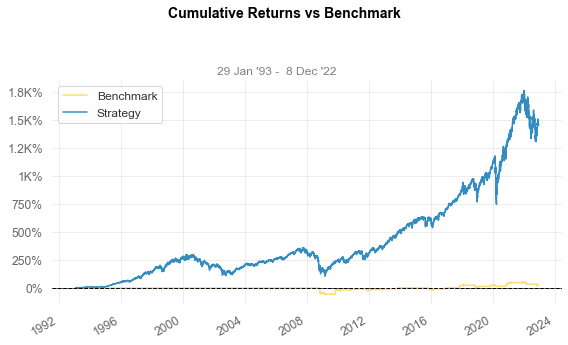

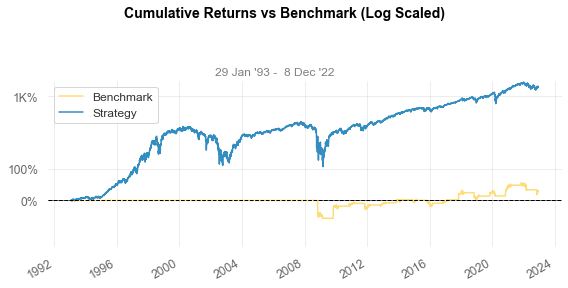

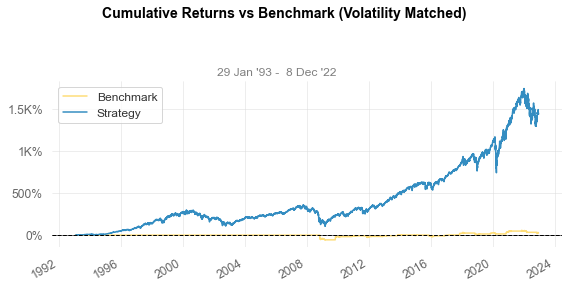

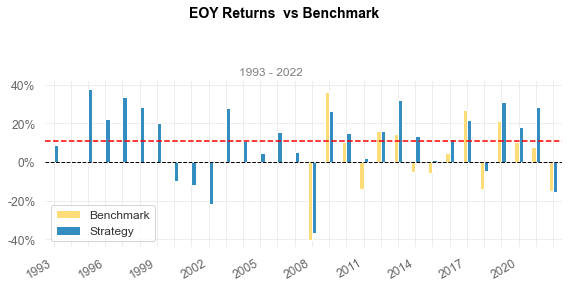

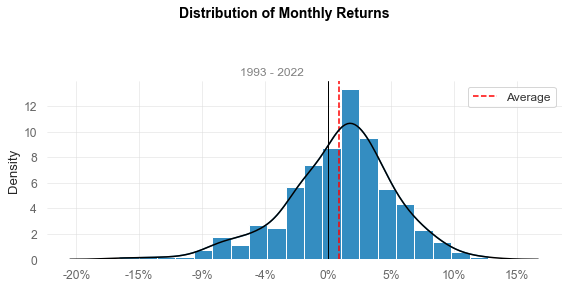

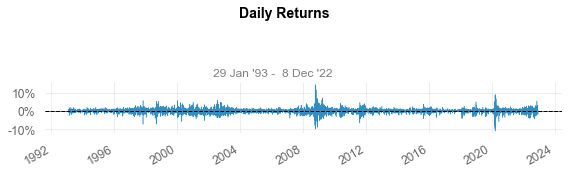

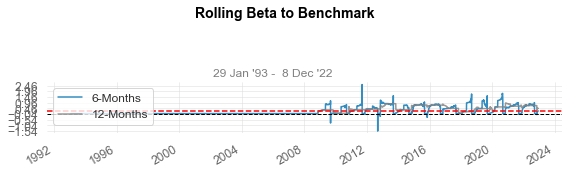

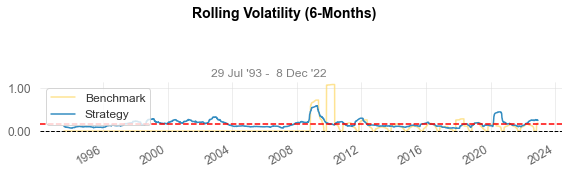

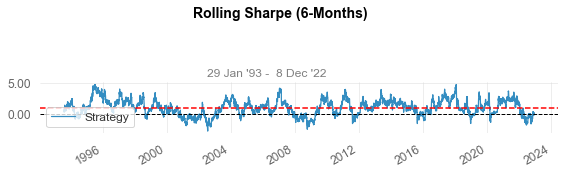

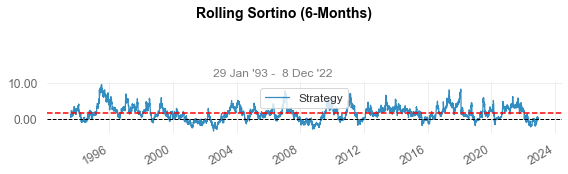

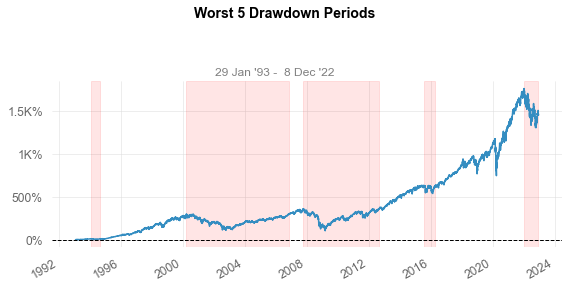

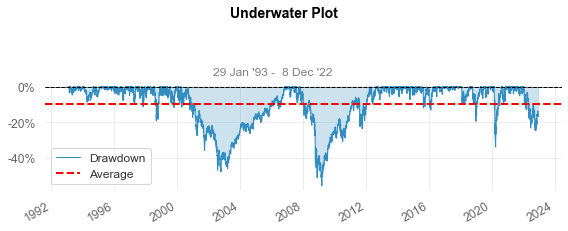

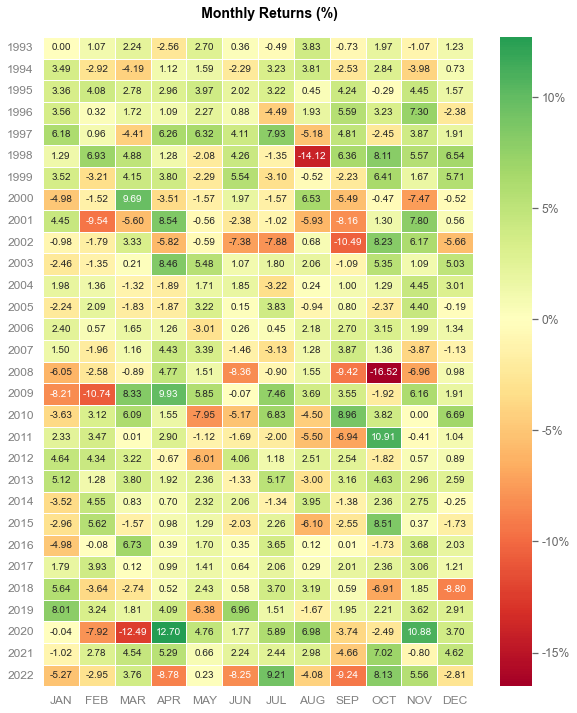

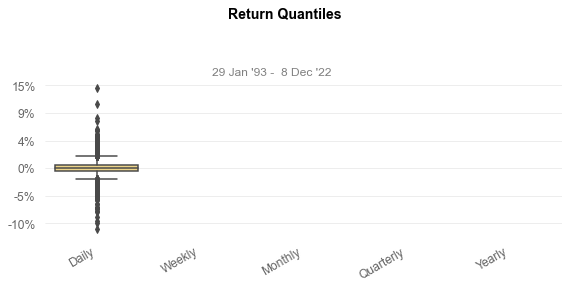

In [21]:
compareto_BenchMarkFC(ticker1="SPY",ticker2='ACWX')


# Time Handler function()1

In [22]:
# from datetime import datetime, change time stamp to str
def dftimeStaptoString(df):
    df.index.strftime("%Y-%m-%d")
    return df

# Time Handler function()2

In [23]:
# cut the time frame/period for study needs; disimble timestamp to diff columns
def timeHandlerFC(df):
    df=df.assign(year=df.index.year, month=df.index.month,day=df.index.day)
    return df

# DataFrame Time Slicer

In [24]:
# study the index for and datetime libaray
def dataFrameYrselectionFC(df,time):
    df=df.loc[df.index>=time]
    return df

In [25]:
# a way to manipulate time period, notice the index has to be original import time stamp to function well
SpyTrimmed2020=SPYadj.copy()
SpyTrimmed2020=dataFrameYrselectionFC(df=SpyTrimmed2020,time='2020-01-01')
SpyTrimmed2020
#perfect just like that, now we can manupulate any time we wanna with lots angels

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,323.540009,324.890015,322.529999,324.869995,311.117065,59151200
2020-01-03,321.160004,323.640015,321.100006,322.410004,308.761169,77709700
2020-01-06,320.489990,323.730011,320.359985,323.640015,309.939056,55653900
2020-01-07,323.019989,323.540009,322.239990,322.730011,309.067688,40496400
2020-01-08,322.940002,325.779999,322.670013,324.450012,310.714813,68296000
...,...,...,...,...,...,...
2022-12-02,402.250000,407.859985,402.140015,406.910004,406.910004,85273900
2022-12-05,403.950012,404.929993,398.170013,399.589996,399.589996,77289800
2022-12-06,399.420013,399.989990,391.640015,393.829987,393.829987,77972200


# Build VolumeOverPriceTool

In [26]:
# df:dataframe from yfinance
#x price interval for underlying price
#n slicer where interval start
#m slicer where interval end
# it build analysis base on close price and sum of the history vloume over price
# seek to find the signficance of price that interpreted by volume
#480 is hard coded, seems like take a while for market to make new high, We can use df['close'].max() to replace 480
#combine with dataatrimm function very powerful, show dynamic
def volumeonPriceintervalFC(df,x,n,m):
    binn=np.arange(0,480,x).tolist()
    result=pd.cut(df['Close'],bins=binn)
    df['Range']=result
    fm=df.groupby(['Range']).sum()['Volume'][n:m]  
    gp=fm.plot(kind='bar')
    return gp,fm
    
    

(<AxesSubplot:xlabel='Range'>,
 Range
 (380, 381]    367145700
 (381, 382]    735766800
 (382, 383]    303618300
 (383, 384]    326967200
 (384, 385]    418137800
 (385, 386]    182145200
 (386, 387]    223369200
 (387, 388]    434590300
 (388, 389]    276211800
 (389, 390]    998826700
 (390, 391]    634205700
 (391, 392]    305457500
 (392, 393]    673224800
 (393, 394]    444541000
 (394, 395]    564978600
 (395, 396]    758701300
 (396, 397]    494862800
 (397, 398]    260396400
 (398, 399]    493176800
 (399, 400]    270216000
 (400, 401]    259127000
 (401, 402]    272806300
 (402, 403]    164177800
 (403, 404]            0
 (404, 405]            0
 (405, 406]    320066300
 (406, 407]    445489500
 (407, 408]    220964900
 (408, 409]    204328200
 (409, 410]     86585800
 Name: Volume, dtype: int64)

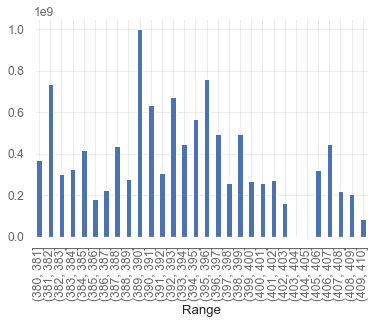

In [27]:
#combine with dataatrimm function very powerful, show dynamic
volumeonPriceintervalFC(SpyTrimmed2020,1,380,410)

# Day counts up
   

In [28]:
# we can consider add display to make it side by side
def consecutiveupdistributionFC(df):
    L=df['Adj Close'].tolist()
    dayupdistribution=[]
    adjcloseprior=L[0]
    count=0
    for x in range(len(L)-1):
        if L[x+1]>L[x]:
            count=count+1
        else:
            dayupdistribution.append(count)
            count=0
    dayupdistribution
    daycountdistributiondf=pd.DataFrame({"daycountoccurance":dayupdistribution})
    daycountdistributiondf["Occurance"]=0
    consecutiveupdstribution=daycountdistributiondf.groupby(['daycountoccurance']).count()
    consecutiveupdstribution
    nodownday=consecutiveupdstribution.copy().drop(0)
    nodownday['%ofwholeset']=round((nodownday['Occurance']/nodownday['Occurance'].sum())*100,2).astype(str)+'%'
    gpp=nodownday['Occurance'].plot(kind='bar')
    gp=consecutiveupdstribution.plot(kind='bar')
    return gpp,nodownday,consecutiveupdstribution,gp


##need to add the format string
    

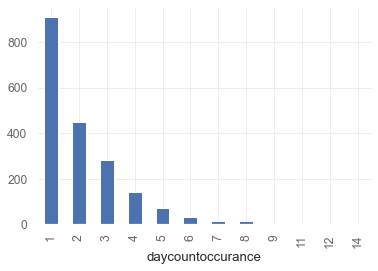

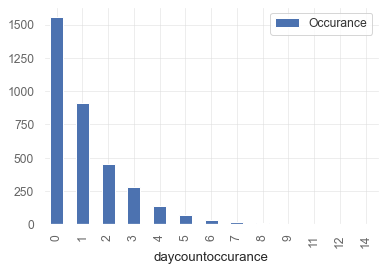

In [29]:
# note all down day marked as 0, % fullset is note a probability
a1,a2,a3,a4=consecutiveupdistributionFC(SPYadj)

In [30]:
# more intuitive way to show days up, a mean reversal strategy under way?
a2

,Occurance,%ofwholeset
daycountoccurance,,
1,908,47.29%
2,450,23.44%
3,284,14.79%
4,140,7.29%
5,71,3.7%
6,32,1.67%
7,17,0.89%
8,13,0.68%
9,2,0.1%


# Caculate rate of changes

In [31]:
# notice a good way to understand how it work is to write a function.


# Caculate Return and Return distribution

In [32]:
# have math dependency due to math.celi()
#Kurtosis -peak and tail of the return distribution; normal distribution have Kurtosis near 0
#imperical data may be more peaky with fater tail
#Skewness # negative side tail is fatter than postive side; extrem negative movement more likely
def Caculate_ReturnFC(df):
    df['return%']=((df['Close']-df['Open'])/df['Open']*100).round(2)
    dfraw=df['return%'].copy()
    x=df['return%'].max()
    y=df['return%'].min()
    describe=df['return%'].describe()
    skewness=st.skew(df['return%'].dropna())
    kurtosiss=st.kurtosis(df['return%'].dropna())
    # notcie shapiro not effective if n>5000
    #shapiro is a fair estimate on probability wise, still not a gurantee judgement
    # will sample 5000 a good way to go?
    p_value=st.shapiro(df['return%'].dropna().sample(5000))[1]
    # in scipy it return excess kurtosis as defualt
    print(f"daily return excess kurtosis(after -3 from normal) at {kurtosiss}")
    print(f"daily return skewness at {skewness}")
    print(f"daily return p_value at {p_value}")
    if p_value<=0.05:
        print("Null hypothesis of normality is rejected.")
    else:
        print("Null hypothesis of normality is accepted.")
    L=np.arange(y,math.ceil(x),1)
    df['daily_%return_range']=pd.cut(df['return%'],bins=L)
    gp=df.groupby(['daily_%return_range']).count()['Close'].plot(kind='bar')
    df['return%']=(df['return%']).astype(str)+'%'
    df=df.drop(columns='daily_%return_range')
    
    # {"stdv":[1,2,3],"normal:[]"}

    dfraww=dfraw.to_frame()
    stdd=dfraww.std()
    meann=dfraww.mean()
    #normal distribution prama
    y=[0.6820,0.9540,0.99]
    Distr=[]
    for x in y:
        m=x*len(SPYadj)
        Distr.append(m)
    Distr

    upper1std=meann+stdd
    lower1std=meann-stdd
    upper2std=meann+(2*stdd)
    lower2std=meann-(2*stdd)
    upper3std=meann+(3*stdd)
    lower3std=meann-(3*stdd)
    Distrbin=[f"{round(lower1std[0],4)} ~{round(upper1std[0],4)}",\
              f"{round(lower2std[0],4)}~{round(upper2std[0],4)}",\
              f"{round(lower3std[0],4)}~{round(upper3std[0],4)}"]
    a1=len(dfraww.loc[(dfraww['return%']>lower2std[0] )& (dfraww['return%']<upper1std[0])])
    a2=len(dfraww.loc[(dfraww['return%']>lower2std [0])& (dfraww['return%']<upper2std[0])])
    a3=len(dfraww.loc[(dfraww['return%']>=lower2std[0] )& (dfraww['return%']<=upper3std[0])])
    actual=[]
    actual.append(a1)
    actual.append(a2)
    actual.append(a3)
    actual
    normalFreq=pd.DataFrame({'Distribin':Distrbin})
    normalFreq['Empirical']=actual
    normalFreq['Normal']=Distr
    normalFreq
    
    

    return df,gp,describe,normalFreq,dfraw
#we can unpack a4 for study 
# how can we create a normal distribution one to fit our data


In [33]:
a1,a2,a3,a4,a5=Caculate_ReturnFC(SPYadj)

daily return excess kurtosis(after -3 from normal) at 8.48216648208405
daily return skewness at -0.0576656848090931
daily return p_value at 0.0
Null hypothesis of normality is rejected.


NameError: name 'math' is not defined

In [ ]:
a1

In [ ]:
a3

In [ ]:
# compare the number of occurange base on index:0->1sigma;
#index:1->2sigma
#index2->3 sigma
#we can notice how it is disobeyed among diff bins
a4

# Calculate ATR- Historical vol

In [ ]:
# beautiful set up, it allow u to scope atr for realiize vol by anchor at today's date
def anchoredATRCalFC(df):
    df['TrueRange']=df['High']-df['Low']
    atrSpy=df.copy().ta.reverse.reset_index()
    rolling2D=[((atrSpy['TrueRange'][x]+atrSpy['TrueRange'][x+1])/2)/(atrSpy['Open'][x])for x in range(len(SPYadj)-1)]
    rolling2Draw=pd.Series(rolling2D)
    atrSpy['rolling2D']=(rolling2Draw*100).round(5).astype(str)+'%'
    
  #find out the atr change overtime from anchored date
    a={"years":["5days","20days","60days","1year","3year","5years","10years","20years","50years"]}
    b={"Days":[5,20,60,250,750,1250,2500,5000,12500]}
    c={"AvgDailyATRbaseonPeriod":[]}
    for x in b['Days']:
        #60period we need to add one digit; notice it start from 0 and exlude the last one on slicer,balance out
        periodmean=str(round((rolling2Draw[:x+1].mean()*100),3))+'%'
        c['AvgDailyATRbaseonPeriod'].append(periodmean)
    anchoredATR=pd.DataFrame({'years':a['years'],'Days':b['Days'],\
                              'AvgDailyATRbaseonPeriod':c['AvgDailyATRbaseonPeriod']}).T
    return atrSpy,rolling2Draw,anchoredATR

In [ ]:
aatr,batr,catr=anchoredATRCalFC(SPYadj)
aatr

In [ ]:
# here we anchor at today's date and look back the historical data
# to see how daily vol high-low: trending; max lookback 50yrs
catr

# Caculate Log Return

# Build Graphic Generator

In [ ]:
# note input has to be us stock ticker a commpany wiht ""; eg input="SPY"(StockTickers)
# start/end date has to be "YYYY-MM-DD" format
def generateachart(input,start,end): # is this the dependency not within the function?# notice need to put diff quotation on it
    ticker=yf.Ticker(input)
    Fetched=ticker.history(start=start,end=end)
    plt.figure(figsize=(10,6))
    performance=plt.plot(Fetched['Close'])
    plt.grid()
    plt.show()
# looking for the documentary to define the functions

In [ ]:
generateachart(input='Spy',start='2000-01-01',end='2022-01-01')

In [ ]:
generateachart('ACWX','2000-01-01','2022-01-01') # note here data only avaliable since 2008

In [ ]:
SpyTrimmed2020.info()

# BollingerBand

In [117]:
def showBbandsFC(df):
    a=df.ta.bbands(close='Adj Close',length=20,append=True)
    b=df[['BBU_20_2.0','Adj Close','BBL_20_2.0']]
    gp=b.plot()
    return gp,df

In [118]:
#used the trim function to shorten the data frame match AWCX existance
#2008-4-01
Spytrimmed2008=SPYadj.copy()
Spytrimmed2008=dataFrameYrselectionFC(Spytrimmed2008,'2008-4-1')

In [119]:
showBbandsFC(df=Spytrimmed2008)

AttributeError: 'DataFrame' object has no attribute 'ta'

In [120]:
# A comparable Bollinger band study to see if there is signifcant statistic boundary difference;
# this can be use as statistic boundary for future algo building
showBbandsFC(df=ACWXdf)

AttributeError: 'DataFrame' object has no attribute 'ta'

In [101]:
dftiwtter=pd.read_csv('sentimentresult.csv')
dftiwtter

,Unnamed: 0,username.1,name,day of publication,textclean,sentiment,helper
0,0,Degennaroinvest,Cataldo De gennaro,2022-11-09,rt saylor the prices may gyrate the players ma...,NEGATIVE,-1
1,1,Degennaroinvest,Cataldo De gennaro,2022-11-09,i believe everybody can make a small contribut...,POSITIVE,1
2,2,Degennaroinvest,Cataldo De gennaro,2022-11-09,httpstcosisqmkkajn\n\ngreat news for plug\ngre...,POSITIVE,1
3,3,Degennaroinvest,Cataldo De gennaro,2022-11-09,rt plugpowerinc just got off bloomberg tv hig...,POSITIVE,1
4,4,Degennaroinvest,Cataldo De gennaro,2022-11-09,bionano genomics announces first publication u...,POSITIVE,1
...,...,...,...,...,...,...,...
6346,6346,federalreserve,Federal Reserve,2022-12-07,federalreserve invites public comment on propo...,POSITIVE,1
6347,6347,federalreserve,Federal Reserve,2022-12-07,approval of the application by farmers nationa...,NEGATIVE,-1
6348,6348,federalreserve,Federal Reserve,2022-12-07,federalreserve finalizes clarifying and techni...,NEGATIVE,-1
6349,6349,federalreserve,Federal Reserve,2022-12-07,having an issue with your bank did your credi...,NEGATIVE,-1


In [122]:
dfright=dftiwtter.groupby('day of publication').sum()['helper'].to_frame()
dfright=dfright.reset_index().rename(columns={"day of publication":"Date"})
dfright

,Date,helper
0,2022-07-03,-34
1,2022-07-07,-44
2,2022-07-12,-64
3,2022-07-26,-73
4,2022-08-05,-68
5,2022-08-11,-50
6,2022-08-16,-66
7,2022-08-19,-60
8,2022-08-26,-57
9,2022-08-27,-30


In [102]:
Spycutt=SPYadj.copy()

In [115]:
def dftimeStaptoString(df):
    df.index.strftime("%Y-%m-%d")
    return df

In [127]:

returnforplot=dataFrameYrselectionFC(a1,'2022-07-03')
# Mergerleft=returnforplot['return%'].to_frame()
# Mergerleft

AttributeError: 'AxesSubplot' object has no attribute 'loc'

In [128]:
dfmergeleft=dftimeStaptoString(returnforplot).reset_index()
dfmergeleft

NameError: name 'returnforplot' is not defined

In [106]:
dfmergeleft['Date']=dfmergeleft['Date'].astype(str)
dfmergeleft

NameError: name 'dfmergeleft' is not defined

In [108]:
type(dfmergeleft['Date'][0])

NameError: name 'dfmergeleft' is not defined

In [109]:
forgraphh=pd.merge(dfmergeleft,dfright,on='Date',how='inner')

NameError: name 'dfmergeleft' is not defined

In [110]:
returnforplot

NameError: name 'returnforplot' is not defined

In [123]:
returnforplot

NameError: name 'returnforplot' is not defined

In [113]:
forgraphh

NameError: name 'forgraphh' is not defined

In [114]:
forgraphh.to_csv('Desktop/Group-Project1/senti_SPY.csv')

NameError: name 'forgraphh' is not defined